In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/train.csv')

df2 = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/test.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning  & Preparation

In [14]:
print(df['Cabin'].nunique())
print(df['Parch'].nunique())
print(df['Embarked'].nunique())
print(df['SibSp'].nunique())
df['Pclass'].nunique()

147
7
3
7


3

In [15]:

# fill Null value of 'Age' with the mean value by sex
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))

# drop 'Cabin' variable, due to have too much Null value
df = df.drop('Cabin',axis=1)

# drop missing value in 'Embarked' feature
df = df.dropna(subset=['Embarked'])

# drop unrelated columns
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

# convert categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Conduct same data clearning to testing dataframe



In [18]:

# fill Null value of 'Age' with the mean value by sex
df2['Age'] = df2['Age'].fillna(df2.groupby('Sex')['Age'].transform('mean'))

# drop 'Cabin' variable, due to have too much Null value
df2 = df2.drop('Cabin',axis=1)

# drop missing value in 'Embarked' and 'Fare' feature
df2 = df2.dropna(subset=['Embarked'])
df2 = df2.dropna(subset=['Fare'])

# drop unrelated columns
df2 = df2.drop('PassengerId', axis=1)
df2 = df2.drop('Name', axis=1)
df2 = df2.drop('Ticket', axis=1)

# convert categorical variables
df2['Sex'] = LabelEncoder().fit_transform(df2['Sex'])
df2['Embarked'] = LabelEncoder().fit_transform(df2['Embarked'])



In [19]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int32  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 22.8 KB


## Data Statistics

In [20]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.690446,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.981441,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Exploratory Analysis

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

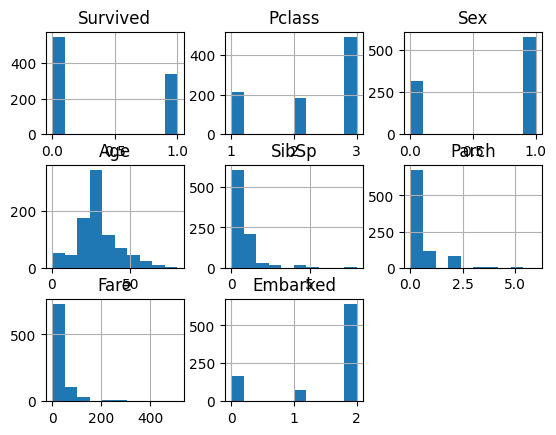

In [21]:
df.hist()

### Check outliers

<function matplotlib.pyplot.show(close=None, block=None)>

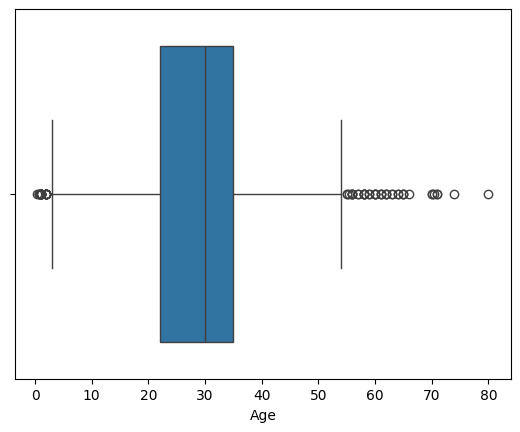

In [22]:
sns.boxplot(x = df['Age'])
plt.show

<Axes: xlabel='Fare'>

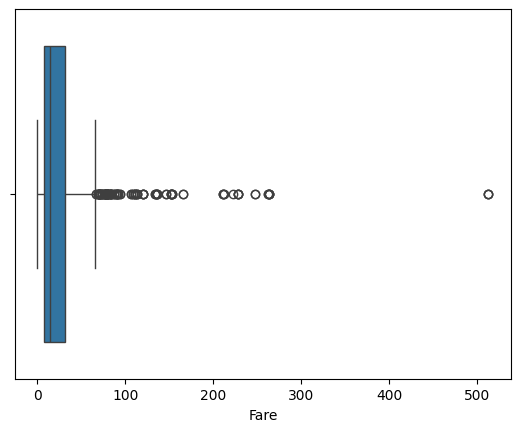

In [23]:
sns.boxplot(x = df['Fare'])

<Axes: xlabel='Fare', ylabel='Survived'>

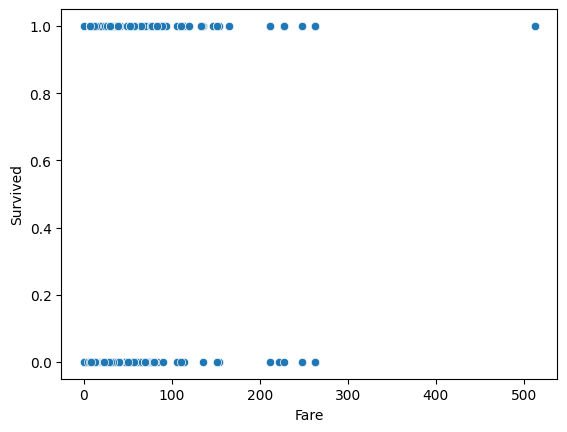

In [24]:
sns.scatterplot(x=df['Fare'], y= df['Survived'])

## Build models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Linear Model  --Logistric Regresssion

In [26]:
# define X and Y
X = df.drop('Survived', axis=1)
y = df['Survived']

# split data

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

In [27]:
# train model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)


lr_accracy = accuracy_score(y_test, y_pred)
lr_confusion_matrix = confusion_matrix(y_test,y_pred)
lr_f1_score = f1_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_prob[:,1])

print('Logistic Regression Accuracy Score: ', lr_accracy)
print('Logistic Regression F1 Score: ', lr_f1_score)

print('Logistic Regression Confusion Matrix: ', lr_confusion_matrix)
print('Logistic Regression ROC AUC Score: ', lr_roc_auc)


Logistic Regression Accuracy Score:  0.7752808988764045
Logistic Regression F1 Score:  0.7297297297297297
Logistic Regression Confusion Matrix:  [[84 25]
 [15 54]]
Logistic Regression ROC AUC Score:  0.8535434117803482


In [29]:
# validation

y_pred_val = lr.predict(X_val)
lr_prob_val = lr.predict_proba(X_val)

lr_accracy_val = accuracy_score(y_val, y_pred_val)
lr_f1_score_val = f1_score(y_val, y_pred_val)
lr_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
lr_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Logistic Regression Accuracy Score: ', lr_accracy_val)
print('Logistic Regression F1 Score: ', lr_f1_score_val)
print('Logistic Regression Confusion Matrix: ', lr_confusion_matrix_val)
print('Logistic Regression ROC AUC Score: ', lr_roc_auc_val)

Logistic Regression Accuracy Score:  0.7802690582959642
Logistic Regression F1 Score:  0.7167630057803469
Logistic Regression Confusion Matrix:  [[112  29]
 [ 20  62]]
Logistic Regression ROC AUC Score:  0.8487285936689155


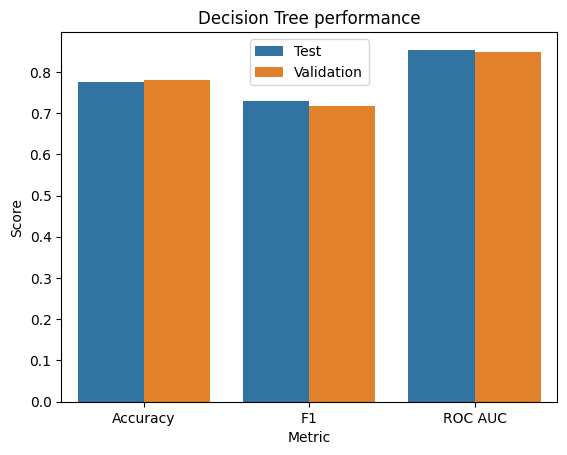

In [30]:
import numpy as np

data = {
    'Dataset': ['Test', 'Test', 'Validation', 'Validation'],
    'Metric': ['Accuracy','F1', 'ROC AUC', 'Accuracy', 'F1','ROC AUC'],
    'Score': [lr_accracy,lr_f1_score, lr_roc_auc, lr_accracy_val,lr_f1_score_val, lr_roc_auc_val]
}

data = {
    'Dataset': ['Test', 'Test', 'Test', 'Validation', 'Validation', 'Validation'],
    'Metric': ['Accuracy', 'F1', 'ROC AUC', 'Accuracy', 'F1', 'ROC AUC'],
    'Score': [lr_accracy, lr_f1_score, lr_roc_auc, lr_accracy_val, lr_f1_score_val, lr_roc_auc_val]
}

df_summary = pd.DataFrame(data)


sns.barplot(x=df_summary['Metric'], y= df_summary['Score'], hue='Dataset', data = df_summary)
plt.title('Decision Tree performance')
plt.legend(loc ='best')


Non-linear models

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


Decision Tree

In [39]:
# Decision tree
# define X and Y
X = df.drop('Survived', axis=1)
y = df['Survived']

# split data

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)



# build model

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# predict
dt_pred = dt.predict(X_test)

# evaluation
dt_accurate = accuracy_score(y_test, dt_pred)
dt_f1_score =f1_score(y_test, y_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
dt_classification_report = classification_report(y_test,dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

print('Decision Tree Accurate Score:', dt_accurate)
print('Decision Tree F1 Score: ', dt_f1_score)
print('Decision Tree Confusion Matrix:', dt_confusion_matrix)
print('Decision Tree Classification Report:', dt_classification_report)
print('Decision Tree ROC AUC:', dt_roc_auc)





Decision Tree Accurate Score: 0.8202247191011236
Decision Tree F1 Score:  0.7297297297297297
Decision Tree Confusion Matrix: [[95 14]
 [18 51]]
Decision Tree Classification Report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

Decision Tree ROC AUC: 0.8053450339050658


In [40]:
# validation

y_pred_val = dt.predict(X_val)
dt_prob_val = lr.predict_proba(X_val)

dt_accracy_val = accuracy_score(y_val, y_pred_val)
dt_f1_score_val = f1_score(y_val, y_pred_val)
dt_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
dt_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Decision Tree Accuracy Score: ', dt_accracy_val)
print('Decision Tree F1 Score: ', dt_f1_score_val)
print('Decision Tree Confusion Matrix: ', dt_confusion_matrix_val)
print('Decision Tree ROC AUC Score: ', dt_roc_auc_val)

Decision Tree Accuracy Score:  0.820627802690583
Decision Tree F1 Score:  0.7435897435897435
Decision Tree Confusion Matrix:  [[125  16]
 [ 24  58]]
Decision Tree ROC AUC Score:  0.8487285936689155


Random Forest

In [41]:

# Decision tree
# define X and Y
X = df.drop('Survived', axis=1)
y = df['Survived']

# split data

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)


# build model
rf = RandomForestClassifier(n_estimators=10, max_depth= None, min_samples_split=2, random_state=42)
rf.fit(X_test, y_test)

# predict
rf_pred = rf.predict(X_test)


# Evaluate performance
rf_accurate = accuracy_score(y_test, dt_pred)
rf_f1_score = f1_score(y_val, y_pred_val)
rf_confusion_matrix = confusion_matrix(y_test, dt_pred)
rf_classification_report = classification_report(y_test,dt_pred)
rf_roc_auc = roc_auc_score(y_test, dt_pred)

print('Random Forest Accurate Score:', rf_accurate)
print('Decision Tree F1 Score: ', rf_f1_score)
print('Random Forest Confusion Matrix:', rf_confusion_matrix)
print('Random Forest Classification Report:', rf_classification_report)
print('Random Forest ROC AUC:', rf_roc_auc)


Random Forest Accurate Score: 0.8202247191011236
Decision Tree F1 Score:  0.7435897435897435
Random Forest Confusion Matrix: [[95 14]
 [18 51]]
Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

Random Forest ROC AUC: 0.8053450339050658


In [43]:
# validation

y_pred_val = dt.predict(X_val)
rf_prob_val = lr.predict_proba(X_val)

rf_accracy_val = accuracy_score(y_val, y_pred_val)
rf_f1_score_val = f1_score(y_val, y_pred_val)
rf_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
rf_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Random Forest Accuracy Score: ', rf_accracy_val)
print('Random Forest  F1 Score: ', rf_f1_score_val)
print('Random Forest  Confusion Matrix: ', rf_confusion_matrix_val)
print('Random Forest  ROC AUC Score: ', rf_roc_auc_val)

Random Forest Accuracy Score:  0.820627802690583
Random Forest  F1 Score:  0.7435897435897435
Random Forest  Confusion Matrix:  [[125  16]
 [ 24  58]]
Random Forest  ROC AUC Score:  0.8487285936689155


## Summary

In [58]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest'],
    'Metric': ['Accuracy', 'F1 Score', 'Accuracy', 'F1 Score', 'Accuracy', 'F1 Score'],
    'Score': [lr_accracy, lr_f1_score, dt_accurate, dt_f1_score, rf_accurate, rf_f1_score]
}

# Create DataFrame
df_summary_2 = pd.DataFrame(data)

df_summary_2





,Model,Metric,Score
0,Logistic Regression,Accuracy,0.775281
1,Logistic Regression,F1 Score,0.729730
2,Decision Tree,Accuracy,0.820225
3,Decision Tree,F1 Score,0.729730
4,Random Forest,Accuracy,0.820225
5,Random Forest,F1 Score,0.743590


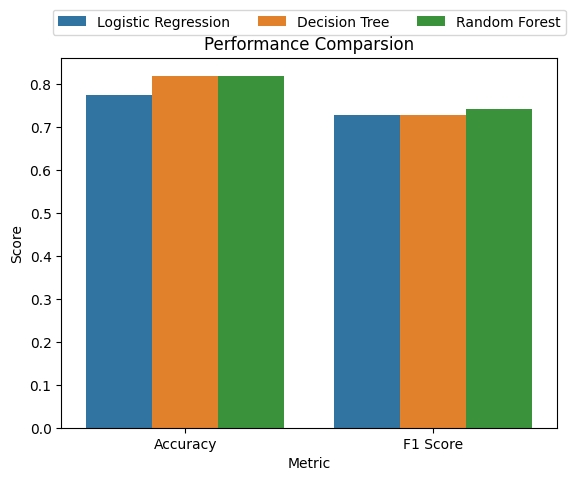

In [59]:
# plot
sns.barplot(x='Metric', y='Score', hue='Model', data = df_summary_2)
plt.title('Performance Comparsion')
#plt.legend(loc= 'best', bbox_to_anchor =(0.5,1,15), ncol =3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)

Overall, Random Forest stands out with the F-1 score of 74% and the accuracy rate of 82%.  It makes sense, since randome forest model is ensemble models which perfom better than individual models , it reduces the variance and bias,  also has the ability to capture more complexity in the data. 